In [1]:
import pandas as pd
import nltk

In [2]:
a = pd.read_csv("../data/raw/winemag-data-130k-v2.csv")
a

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
b = a.drop("Unnamed: 0", axis=1)
b

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [4]:
b['price']

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
5         15.0
6         16.0
7         24.0
8         12.0
9         27.0
10        19.0
11        30.0
12        34.0
13         NaN
14        12.0
15        24.0
16        30.0
17        13.0
18        28.0
19        32.0
20        23.0
21        20.0
22        19.0
23        22.0
24        35.0
25        69.0
26        13.0
27        10.0
28        17.0
29        16.0
          ... 
129941    20.0
129942    35.0
129943    29.0
129944    25.0
129945    20.0
129946    17.0
129947    20.0
129948    43.0
129949    35.0
129950    35.0
129951    30.0
129952    22.0
129953    25.0
129954    15.0
129955    40.0
129956    19.0
129957    17.0
129958    35.0
129959    57.0
129960    48.0
129961    30.0
129962    40.0
129963    20.0
129964     NaN
129965    28.0
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64

In [5]:
b['price'].map(lambda x: "Expensive" if x > 20 else "cheap")

0             cheap
1             cheap
2             cheap
3             cheap
4         Expensive
5             cheap
6             cheap
7         Expensive
8             cheap
9         Expensive
10            cheap
11        Expensive
12        Expensive
13            cheap
14            cheap
15        Expensive
16        Expensive
17            cheap
18        Expensive
19        Expensive
20        Expensive
21            cheap
22            cheap
23        Expensive
24        Expensive
25        Expensive
26            cheap
27            cheap
28            cheap
29            cheap
            ...    
129941        cheap
129942    Expensive
129943    Expensive
129944    Expensive
129945        cheap
129946        cheap
129947        cheap
129948    Expensive
129949    Expensive
129950    Expensive
129951    Expensive
129952    Expensive
129953    Expensive
129954        cheap
129955    Expensive
129956        cheap
129957        cheap
129958    Expensive
129959    Expensive


In [6]:
b['price2'] = b['price'].map(lambda x: "Expensive" if x > 20 else "cheap")
b[['description', 'price', 'price2']]

,description,price,price2
0,"Aromas include tropical fruit, broom, brimston...",NaN,cheap
1,"This is ripe and fruity, a wine that is smooth...",15.0,cheap
2,"Tart and snappy, the flavors of lime flesh and...",14.0,cheap
3,"Pineapple rind, lemon pith and orange blossom ...",13.0,cheap
4,"Much like the regular bottling from 2012, this...",65.0,Expensive
5,Blackberry and raspberry aromas show a typical...,15.0,cheap
6,"Here's a bright, informal red that opens with ...",16.0,cheap
7,This dry and restrained wine offers spice in p...,24.0,Expensive
8,Savory dried thyme notes accent sunnier flavor...,12.0,cheap
9,This has great depth of flavor with its fresh ...,27.0,Expensive


In [7]:
b['description'].str.lower()

0         aromas include tropical fruit, broom, brimston...
1         this is ripe and fruity, a wine that is smooth...
2         tart and snappy, the flavors of lime flesh and...
3         pineapple rind, lemon pith and orange blossom ...
4         much like the regular bottling from 2012, this...
5         blackberry and raspberry aromas show a typical...
6         here's a bright, informal red that opens with ...
7         this dry and restrained wine offers spice in p...
8         savory dried thyme notes accent sunnier flavor...
9         this has great depth of flavor with its fresh ...
10        soft, supple plum envelopes an oaky structure ...
11        this is a dry wine, very spicy, with a tight, ...
12        slightly reduced, this wine offers a chalky, t...
13        this is dominated by oak and oak-driven aromas...
14        building on 150 years and six generations of w...
15        zesty orange peels and apple notes abound in t...
16        baked plum, molasses, balsamic

In [ ]:
b.columns

In [8]:
b[['price', 'points']].describe()

,price,points
count,120975.000000,129971.000000
mean,35.363389,88.447138
std,41.022218,3.039730
min,4.000000,80.000000
25%,17.000000,86.000000
50%,25.000000,88.000000
75%,42.000000,91.000000
max,3300.000000,100.000000


In [9]:
grouped_b = b.groupby('points')

In [10]:
for point, records in grouped_b:
    print(point)
    records_80 = records
    break

80


In [11]:
records_80

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price2
344,Chile,"Aromas of pumpkin, squash and corn chips are s...",Gran Reserva,80,19.0,Leyda Valley,NaN,NaN,Michael Schachner,@wineschach,Viña Tarapacá 2015 Gran Reserva Chardonnay (Le...,Chardonnay,Viña Tarapacá,cheap
3640,Portugal,Aromas of strawberry sherbet are followed by s...,Estreia,80,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Viniverde 2011 Estreia Rosé (Vinho Verde),Rosé,Viniverde,cheap
3641,Chile,"Fluffy, sweet aromas of peach, pear and vanill...",Reserve,80,15.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Cuevas del Sur 2010 Reserve Chardonnay (Maule ...,Chardonnay,Cuevas del Sur,cheap
4556,Italy,"There's a thorny, almost raw quality of fruit ...",Rondineto,80,12.0,Central Italy,Colli Aprutini,NaN,NaN,NaN,Fattoria Giuseppe Savini 2011 Rondineto Merlot...,Merlot,Fattoria Giuseppe Savini,cheap
4557,Spain,"With dusty, candied aromas, the bouquet on thi...",Demi Sec,80,14.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Paul Cheneau NV Demi Sec Sparkling (Cava),Sparkling Blend,Paul Cheneau,cheap
5905,Argentina,"Ashy, green and funky smelling, then sweet, ch...",NaN,80,17.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Bodega Carmine Granata 2009 Sémillon (Mendoza),Sémillon,Bodega Carmine Granata,cheap
5906,Argentina,"A rough, pinchy nose with leather and funk is ...",Grand Reserve,80,20.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Cruz Alta 2007 Grand Reserve Malbec (Mendoza),Malbec,Cruz Alta,cheap
5907,Argentina,"Heavily vegetal and unclean on the nose, then ...",NaN,80,15.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Ricardo Santos 2009 Sémillon (Mendoza),Sémillon,Ricardo Santos,cheap
5908,Argentina,"Mute on the nose, but heavy in the mouth, with...",NaN,80,12.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gardel 2009 Torrontés (Mendoza),Torrontés,Gardel,cheap
5909,Argentina,"Medicinal and feral on the nose, then heavy, t...",Colección,80,12.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Alma del Sur 2009 Colección Cabernet Sauvignon...,Cabernet Sauvignon-Malbec,Alma del Sur,cheap


In [14]:
import matplotlib.pyplot as plt

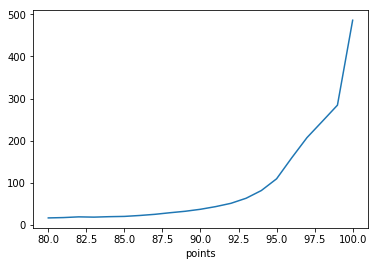

In [17]:
grouped_b["price"].mean().plot()
plt.show()

In [20]:
b.loc[0]

country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                                                             Nicosia
price2                   